# 02b - Protocol Usage
Understand facts across different protocols offering flash loans.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so

## Ethereum Category Distribution

In [6]:
df = pd.read_parquet("../data/flash_loans/ethereum_flash_loans.parquet")

In [52]:
protocol_dict = {
    'Uniswap V2': 'Flash Swap',
    'Balancer V2': 'Flash Loan',
    'SushiSwap': 'Flash Swap',
    'dYdX V1': 'Flash Loan',
    'Aave V1': 'Flash Loan',
    'Aave V2': 'Flash Loan',
    'Aave V3': 'Flash Loan',
    'DODO V2': 'Flash Swap',
    'Euler Finance V1': 'Flash Loan',
    'Uniswap V3': 'Flash Swap',
    'Maker V1': 'Flash Mint',
    'Spark Protocol V1': 'Flash Loan',
    'Morpho Blue V1': 'Flash Loan'
}

In [53]:
df['flash_type'] = df['protocol'].map(protocol_dict)

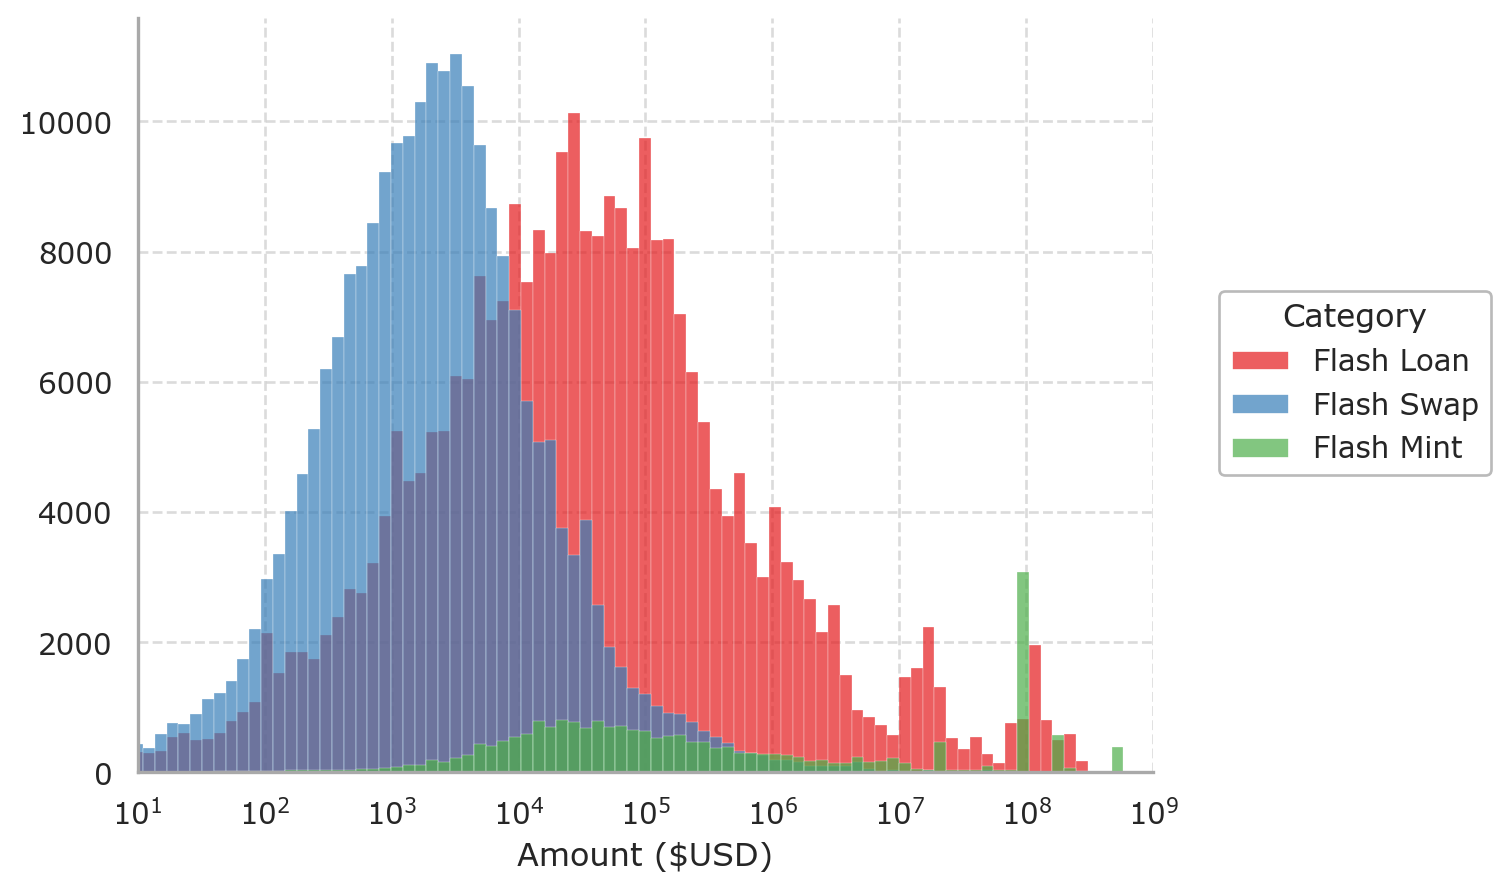

In [171]:
sns.set_palette('Set2')
p = (
    so.Plot(
        df.query("amount_usd > 0"),
        x="amount_usd", 
        color='flash_type',
    )
    .add(so.Bars(alpha=0.7), so.Hist(bins=300))
    .scale(x="log", color='Set1')
    .limit(x=(10, 10**9))
    ).label(
        x='Amount ($USD)', y='', color='Category'
    ).layout(
        size=(6.4,4.8),
        engine='tight'
    )

p = p.theme(
    {"axes.facecolor": "w",
     "axes.edgecolor": "darkgrey",
     "font.family": 'sans-serif', 
     'font.sans-serif':'Verdana',
     'axes.spines.top':False,
     'axes.spines.right':False,
     'axes.grid':True,
     'axes.grid.axis': 'both',
     'axes.axisbelow':True,
     'grid.color':'#D3D3D3',
     'grid.linestyle':'--',
     'grid.alpha':0.8,
     'legend.edgecolor':'darkgrey'
     }
    )
p.save("../figures/protocols/hist_ethereum_value.svg", bbox_inches='tight')

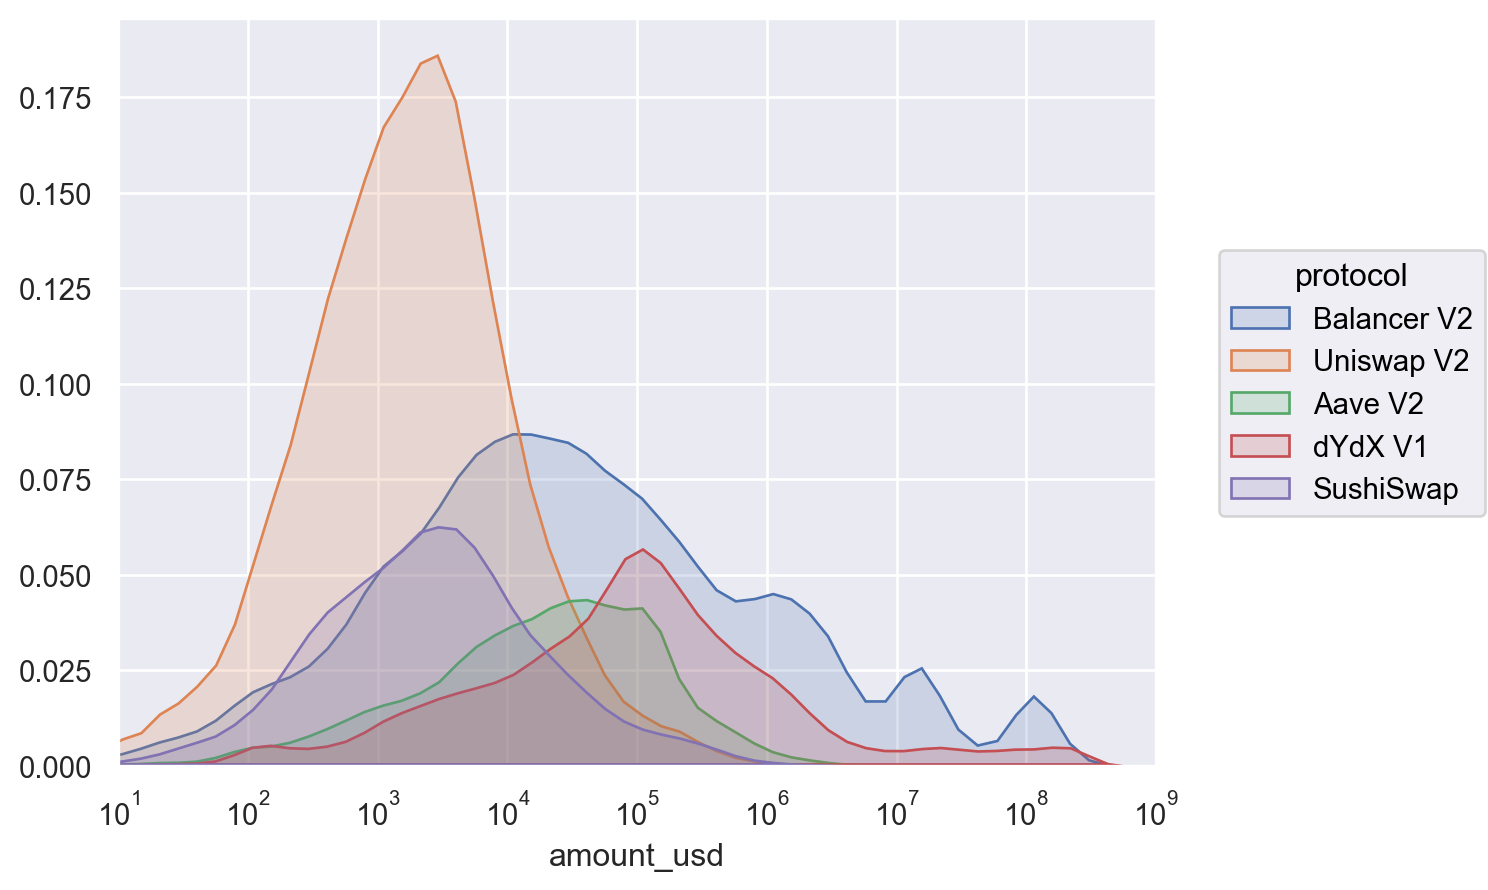

In [36]:
(
    so.Plot(
        df.query("amount_usd > 0 and protocol in ['Uniswap V2', 'Balancer V2', 'dYdX V1', 'SushiSwap', 'Aave V2']"),
        x="amount_usd",
        color='protocol')
    .add(so.Area(), so.KDE())
    .scale(x="log")
    .limit(x=(10, 10**9))
)